In [33]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import pickle

import sys
sys.path.append('../scripts')
from tools.preprocess import preprocess_seq, cut_seq, to_return

In [8]:
train_full = np.load('../data_coin-price/train.npy')

train_full = train_full[:, :, 1:2] # only 'open'

returns = to_return(train_full)

SRC_LEN = 1350
x = returns[:, :SRC_LEN, :]
y = returns[:, SRC_LEN:SRC_LEN+10, :]

x = x.squeeze(-1)
y = y.squeeze(-1)

In [9]:
x.shape, y.shape

((6343, 1350), (6343, 10))

In [10]:
def mse(x, y):
    return sum((x-y)**2) / len(x)

0.10385748429605328


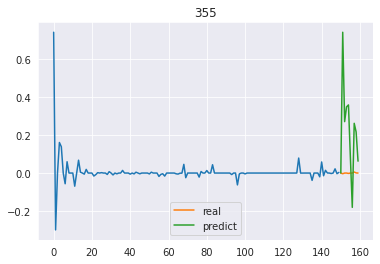

In [75]:
SAMPLE = np.random.randint(x.shape[0])

CUT_HEAD = 1200

x_sample = x[SAMPLE, CUT_HEAD:]
y_sample = y[SAMPLE]

model = ARIMA(x_sample, order=(5,1,1))
fit = model.fit()
preds = fit.predict(0,9)

plt.title(SAMPLE)
x_axis = np.arange(len(x_sample) + len(y_sample))
plt.plot(x_axis[:len(x_sample)], x_sample)
plt.plot(x_axis[-10:], y_sample, label='real')
plt.plot(x_axis[-10:], preds, label='predict')
plt.legend()

print(mse(y_sample, preds))

In [65]:
# calculate mse

mse_list = []

for sample in tqdm(range((x.shape[0]))):
    x_sample = x[sample, CUT_HEAD:]
    y_sample = y[sample]

    try:
        model = ARIMA(x_sample, order=(5,1,1))
        fit = model.fit()
        preds = fit.predict(0,9)

        mse_list.append(mse(y_sample, preds))

    except:
        mse_list.append(np.nan)
        print('\nException occured')

mse_series = pd.Series(mse_list)

100%|██████████| 6343/6343 [12:16<00:00,  8.61it/s]


In [78]:
with open('arima_result.pkl', 'wb') as f:
    pickle.dump(mse_series, f)

In [77]:
mse_series.describe()

count    6.343000e+03
mean     2.097090e-05
std      1.304074e-03
min      0.000000e+00
25%      4.765288e-07
50%      1.245020e-06
75%      3.574090e-06
max      1.038575e-01
dtype: float64